In [489]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import random
# from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

In [490]:
a=[]
b=[]
for i in range(500):
    a.append(random.randint(0,1))
    b.append(random.randint(0,1))


In [491]:
#a = np.array(a)
#a = a.reshape(-1,1)

In [492]:
#b = np.array(b)
#b = b.reshape(-1,1)

z = list(zip(a,b))

In [493]:
c=[]
def sigmoid(x):
    return 1/(1+np.exp(-x))
for i in range(len(z)):
    if z[i][0] ==z[i][1]:
        c.append(0)
    else:
        c.append(1)

In [494]:
#value_prediction  = list(zip(a,b,c))
#print(value_prediction)

In [495]:
a = np.array(a)
b = np.array(b)
c = np.array(c)

In [496]:
d  = np.vstack([a,b])
X =d
Y = c.reshape(1,500)

In [497]:
print(X, '\n'*10,Y )

[[0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
  1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
  1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0
  0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1
  0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1
  0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0
  0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0
  1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1
  1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1
  1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0
  0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0
  1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0
  1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0
  0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 

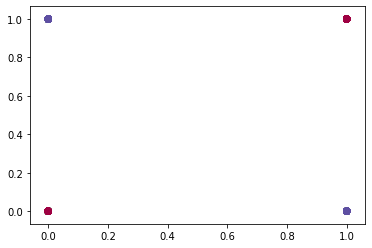

In [498]:
plt.scatter(X[0, :],X[1, :], c=Y.ravel(),s=40, cmap=plt.cm.Spectral);


In [499]:
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!',m)

The shape of X is: (2, 500)
The shape of Y is: (1, 500)
I have m = %d training examples! 500


In [500]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [501]:
# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 52 % (percentage of correctly labelled datapoints)


Text(0.5, 1.0, 'Logistic Regression')

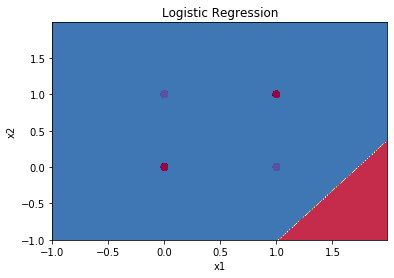

In [502]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)
# Plot the decision boundary
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

In [503]:
def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_h = 2 #size of hidden layer
    n_y = Y.shape[0] # size of output layer
    return n_x, n_h, n_y

In [504]:
(n_x, n_h, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 2
The size of the output layer is: n_y = 1


In [505]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2)
    W1 =  np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 =  np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters



In [506]:

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]]
b1 = [[0.]
 [0.]]
W2 = [[-0.01793436 -0.00841747]]
b2 = [[0.]]


In [507]:

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [508]:
A2, cache = forward_propagation(X, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.002282426127198799 -0.0022821984437736264 6.073401668250271e-05 0.5000151835040849


In [509]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),(1-Y))
    cost =(-1/m)* np.sum(logprobs)
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [510]:
print("cost = " + str(compute_cost(A2, Y, parameters)))

cost = 0.6931471951978843


In [511]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 =  parameters['W1']
    W2 =  parameters['W2']
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache['A1']
    A2 = cache['A2']
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2 = A2-Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T,dZ2),(1 - np.power(A1, 2)))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads



In [512]:


grads = backward_propagation(parameters, cache, X, Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[1.25123023e-04 2.51145937e-04]
 [5.82595648e-05 1.17574280e-04]]
db1 = [[0.00039429]
 [0.00018429]]
dW2 = [[ 3.69531079e-05 -8.08383015e-05]]
db2 = [[-0.02198482]]


In [513]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters



In [514]:
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00431773 -0.00086404]
 [-0.02143187  0.01626162]]
b1 = [[-0.00047315]
 [-0.00022115]]
W2 = [[-0.0179787  -0.00832047]]
b2 = [[0.02638178]]


In [515]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    ### START CODE HERE ### (≈ 1 line of code)
    parameters =initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache =forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads= backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [516]:
parameters = nn_model(X, Y, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.693152
Cost after iteration 1000: 0.008527
Cost after iteration 2000: 0.001563
Cost after iteration 3000: 0.000855
Cost after iteration 4000: 0.000588
Cost after iteration 5000: 0.000448
Cost after iteration 6000: 0.000362
Cost after iteration 7000: 0.000303
Cost after iteration 8000: 0.000261
Cost after iteration 9000: 0.000229
W1 = [[-1.1477977  -1.07314565]
 [-4.50301144  3.96568836]
 [-3.70799829  4.34322631]
 [-1.2261721  -1.14577521]]
b1 = [[-0.7010266 ]
 [-1.88519909]
 [ 1.71753311]
 [-0.62052676]]
W2 = [[-2.34275138  8.68876762 -8.66386184 -2.4762464 ]]
b2 = [[4.13836385]]


In [517]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2>0.5)
            
    ### END CODE HERE ###
    
    return predictions

In [518]:
predictions = predict(parameters, X)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.522


In [519]:


# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')




Accuracy: 100%


Cost after iteration 0: 0.693152
Cost after iteration 1000: 0.008527
Cost after iteration 2000: 0.001563
Cost after iteration 3000: 0.000855
Cost after iteration 4000: 0.000588
Cost after iteration 5000: 0.000448
Cost after iteration 6000: 0.000362
Cost after iteration 7000: 0.000303
Cost after iteration 8000: 0.000261
Cost after iteration 9000: 0.000229


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

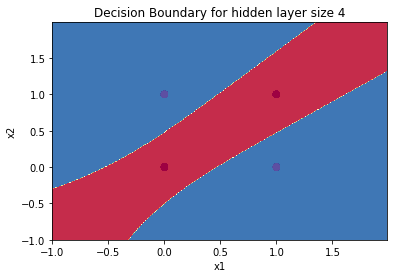

In [520]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))
